In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [18]:
temp=ctrl.Antecedent(np.arange(0,40.1,0.1),'Temperature')
hlev=ctrl.Antecedent(np.arange(0,100.1,0.1),'Humidity Level')
popu=ctrl.Antecedent(np.arange(0,10.1,0.1),'Population')

fspe=ctrl.Consequent(np.arange(0,100.1,0.1),'Fan Speed')
clev=ctrl.Consequent(np.arange(0,100.1,0.1),'Cooling Level')

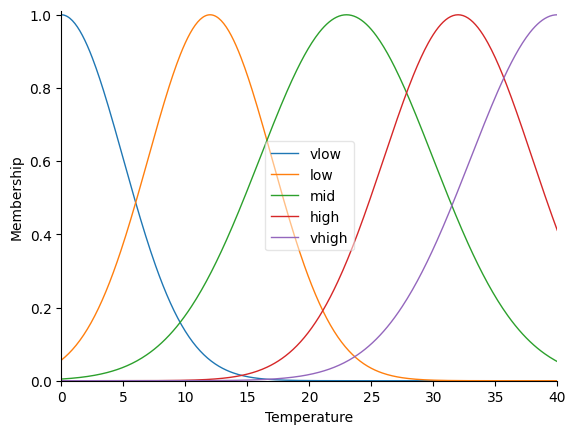

In [26]:
temp['vlow']=fuzz.gaussmf(temp.universe,0,5)
temp['low']=fuzz.gaussmf(temp.universe,12,5)
temp['mid']=fuzz.gaussmf(temp.universe,23,7)
temp['high']=fuzz.gaussmf(temp.universe,32,6)
temp['vhigh']=fuzz.gaussmf(temp.universe,40,7)
temp.view()

In [20]:
hlev['low']=fuzz.gaussmf(hlev.universe,0,25)
hlev['mid']=fuzz.gaussmf(hlev.universe,50,25)
hlev['high']=fuzz.gaussmf(hlev.universe,100,25)

In [21]:
popu['low']=fuzz.gaussmf(popu.universe,0,2.5)
popu['mid']=fuzz.gaussmf(popu.universe,5,2.5)
popu['high']=fuzz.gaussmf(popu.universe,10,2.5)

In [36]:
fspe['low']=fuzz.gaussmf(fspe.universe,0,25)
fspe['mid']=fuzz.gaussmf(fspe.universe,50,25)
fspe['high']=fuzz.gaussmf(fspe.universe,100,25)

In [37]:
clev['low']=fuzz.gaussmf(clev.universe,0,25)
clev['mid']=fuzz.gaussmf(clev.universe,50,25)
clev['high']=fuzz.gaussmf(clev.universe,100,25)

In [38]:
rule1=ctrl.Rule(temp['vlow'],fspe['low'])
rule2=ctrl.Rule(temp['low'],fspe['low'])
rule3=ctrl.Rule(temp['mid'],fspe['mid'])
rule4=ctrl.Rule(temp['high'],fspe['high'])
rule5=ctrl.Rule(temp['mid'],fspe['high'])

In [39]:
rule6=ctrl.Rule(temp['vlow'],clev['low'])
rule7=ctrl.Rule(temp['low'],clev['low'])
rule8=ctrl.Rule(temp['mid'],clev['mid'])
rule9=ctrl.Rule(temp['high'],clev['high'])
rule10=ctrl.Rule(temp['vhigh'],clev['high'])

In [40]:
rule11=ctrl.Rule(hlev['low'],clev['low'])
rule12=ctrl.Rule(hlev['mid'],clev['mid'])
rule13=ctrl.Rule(hlev['high'],clev['high'])

In [41]:
rule14=ctrl.Rule(popu['low'],fspe['low'])
rule15=ctrl.Rule(popu['mid'],fspe['mid'])
rule16=ctrl.Rule(popu['high'],fspe['high'])

In [42]:
rule17=ctrl.Rule(temp['vhigh']&hlev['high']&popu['high'],[clev['high'],fspe['high']])
rule18=ctrl.Rule(temp['mid']&hlev['mid']&popu['mid'],[clev['mid'],fspe['mid']])
rule19=ctrl.Rule(temp['low']&hlev['low']&popu['low'],[clev['low'],fspe['low']])

43.05662913326241
48.001672420153135


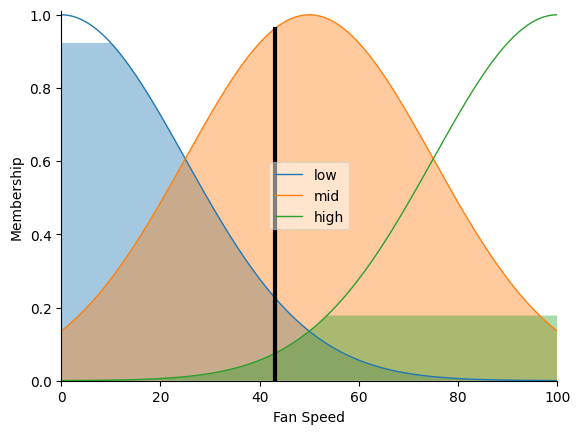

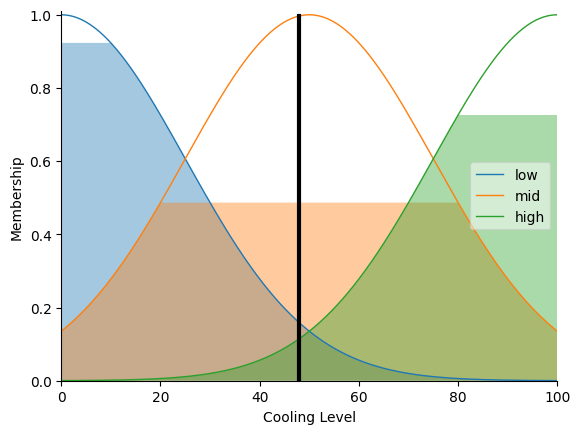

In [43]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Temperature']=10
tipping.input['Humidity Level']=80
tipping.input['Population']=5
tipping.compute()
print(tipping.output['Fan Speed'])
print(tipping.output['Cooling Level'])
fspe.view(sim=tipping)
clev.view(sim=tipping)